## Python env preparation

- check Your Python3 version (I run everything on python3.11)

```bash
python 

Python 3.11.8 (main, Feb  6 2024, 21:21:21) [Clang 15.0.0 (clang-1500.1.0.2.5)] on darwin
Type "help", "copyright", "credits" or "license" for more information.
```
or 
```bash
python3
```

Prepare new environment:
(for Mac OS or Linux)
```bash
python -m venv venv
source venv/bin/activate
(venv) $ ...
pip install -r requirements.txt
```






# Classification problem with Machine Learning

## Dummy models

In [3]:
from utils import evaluate, run
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

iris = load_iris()
iris_train =  iris.data[:100]
iris_target = iris.target[:100]


iris_train = MinMaxScaler().fit_transform(iris_train)

X_train, X_test, y_train, y_test = train_test_split(iris_train, iris_target, test_size=0.2, random_state=44)

# for faster computation
x_train = X_train[:,:2]
n_features = x_train.shape[1]

We have our input data and the resulting labels. 

Our algorithm should predict the iris-type flower. 

This is a classification task since there are distinct outcome values.

Specifically, it is a binary classification task because there are precisely two posiible predictions. 

In [4]:
# A classifier that guesses
import random

def classify(row_of_data):
    return random.randint(0,1)

result = run(classify, X_train)

evaluate(run(classify, X_train), y_train)

'Accuracy 52 %'

In [5]:
print(f" list of predictions: {result[:10]}")

 list of predictions: [0, 0, 1, 1, 0, 0, 0, 0, 1, 0]


In [6]:
import numpy as np
np.array([int(evaluate(run(classify, X_train), y_train).split()[1]) for _ in range(34)]).mean()

49.5

In [7]:
# Simple Quantum Circuit with one Qubit 
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer 

from math import sqrt

qc = QuantumCircuit(1)
state = [1/sqrt(2), 1/sqrt(2)]
qc.initialize(state, 0)
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
state = result.get_statevector()
state.draw('latex')

<IPython.core.display.Latex object>

In [8]:
# My perfect random quantum model 
from qiskit import execute, Aer, QuantumCircuit
from math import sqrt 

def quantum(iris_state):
    qc = QuantumCircuit(1)
    state = [1/sqrt(2), 1/sqrt(2)]
    qc.initialize(state, 0)
    qc.measure_all()
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1).result()
    # {'0':1} or {'1':1}
    counts = result.get_counts()
    return int(list(map(lambda item: item[0], counts.items()))[0])

evaluate(run(classify, X_train), y_train)

'Accuracy 52 %'

In [9]:
np.array([int(evaluate(run(quantum, X_train), y_train).split()[1]) for _ in range(34)]).mean()

48.588235294117645

Let's $|\psi > = \alpha|0> + \beta|1>$ is a qubit state. Any valid qubit state vector must be normalized: $|\alpha|^2 + |\beta|^2=1$


$$|\psi > = \cos{\frac{\theta}{2}}|0> + \sin{\frac{\theta}{2}}|1> $$ 
We can parameterized our Quantum Circuit to get PQC. A PQC is a quantum circuit that takes all data it needs as input parameters.

It will be possible that it predicts the label of the thing based on these parameters? 


In [10]:
from math import cos, sin, pi

def get_state(theta):
    return [cos(theta/2), sin(theta/2)]

theta = -pi/2 # | - > 

def quantum2(iris_state):
    qc = QuantumCircuit(1)
    qc.initialize(get_state(theta), 0)
    # question - how to transform iris_state to get_state(theta) method ? 
    qc.measure_all()

    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1).result()
    counts = result.get_counts()
    
    return int(list(map(lambda item: item[0], counts.items()))[0])

In [11]:
np.array([[int(evaluate(run(quantum2, X_train), y_train).split()[1]) for _ in range(2)] for _ in range(34)]).mean()

49.970588235294116

In [12]:
def pcq_classify(backend, iris_state):
    qc = QuantumCircuit(1)
    qc.initialize(iris_state, 0)
    qc.measure_all()
    result = execute(qc, backend, shots=1).result()
    # {'0':1} or {'1':1}
    counts = result.get_counts()
    return int(list(map(lambda item: item[0], counts.items()))[0])


# Random PCQ 
state = [1/sqrt(2), 1/sqrt(2)]
backend = Aer.get_backend('statevector_simulator')

evaluate(run((lambda x: pcq_classify(backend, state)), X_train), y_train)

'Accuracy 39 %'

Let's separate our code thus far into the three parts:

1. Pre-processing - take iris data as an array of numeric data. It returns a valid quantum state vector. In random case it returns tha balanced state of measuring 0 or 1 with equal probabilities.
```python
def pre_process(iris):
    quantum_state = [1/sqrt(2), 1/sqrt(2)]
    return quantum_state

```

2. PQC - Take quantum backend and a valid qauntum_state as input parameters. It prepares and runs the quatnum circuit before it returns the counts of its measurements.

```python
def pqc(backend, quantum_state):
    qc = QuantumCircuit(1)
    qc.initialize(quantum_state,0)
    qc.measure_all()
    result = execute(qc, backend, shots=1).result()
    counts = result.get_counts()
    return counts

```
3. Post-processing - take counts as input and returns the prediction - interpretation of computations.

```python
def post_process(counts):
    return int(list(map(lambda item: item[0], counts.items()))[0])
```


At the end:
```python
evaluate(run((lambda iris_row: post_process(pcq(backend, pre_process(iris_row))), X_train), y_train))
```

# PQC in qiskit

## One parameter gates

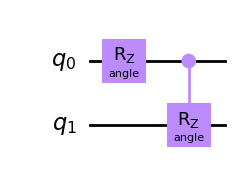

In [13]:
from qiskit.circuit import QuantumCircuit, Parameter

theta = Parameter('angle') # no-defined parameter

qc = QuantumCircuit(2)
qc.rz(theta, 0)
qc.crz(theta, 0, 1)
qc.draw('mpl')

In [14]:
print(qc.parameters)

ParameterView([Parameter(angle)])


## Vector parameters

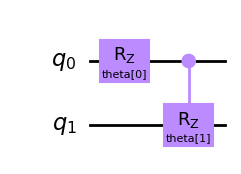

In [15]:
from qiskit.circuit import ParameterVector
theta_list = ParameterVector('theta', length=2)

qc = QuantumCircuit(2)
qc.rz(theta_list[0], 0)
qc.crz(theta_list[1], 0, 1)
qc.draw('mpl')

In [16]:
qc.parameters

ParameterView([ParameterVectorElement(theta[0]), ParameterVectorElement(theta[1])])

but how do we know? what we should use?

How many hidden layers in Neural Networks?

> We don't know that - but we can check it. 

## Data and state encoding 

There is a lot of possibility to encode classical data into quantum state. But this is still an open question.
No methods is proven to be the best for all problems.  

1. **Basis Encoding** - Input the classical data into the basis states.
2. **Amplitude Encoding** - Input the classical data into amplitude vectors with apply some rotations to the quantum circuit. 
3. **Angle Encoding** - Each qubit is associated with each feature and each feature is encoded by rotating the qubits about an angle that data depends on the feature value.

## Expressibility and entangling capability - Hilbert space embeding

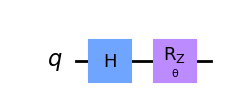

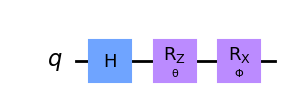

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# First, we need to define the circuits:
theta_param = Parameter('θ')
phi_param = Parameter('Φ')

# Circuit A
qc_A = QuantumCircuit(1)
qc_A.h(0)
qc_A.rz(theta_param, 0)
display(qc_A.draw('mpl'))
# Circuit B
qc_B = QuantumCircuit(1)
qc_B.h(0)
qc_B.rz(theta_param, 0)
qc_B.rx(phi_param, 0)
display(qc_B.draw('mpl'))

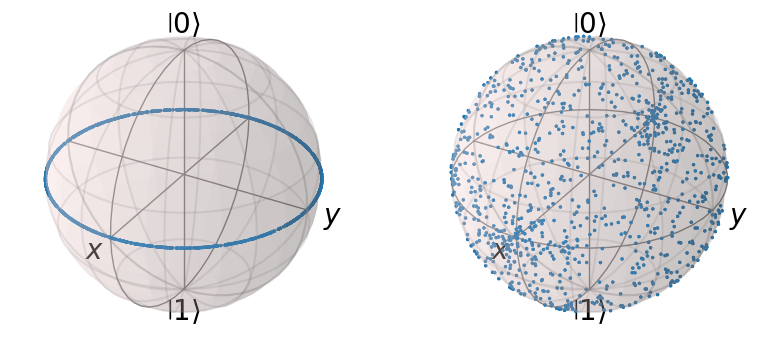

In [18]:
# Next we uniformly sample the parameter space for the two parameters theta and phi
np.random.seed(0)
num_param = 1000
theta = [2*np.pi*np.random.uniform() for i in range(num_param)]
phi = [2*np.pi*np.random.uniform() for i in range(num_param)]

# Then we take the parameter value lists, build the state vectors corresponding
# to each circuit, and plot them on the Bloch sphere:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

def state_to_bloch(state_vec):
    # Converts state vectors to points on the Bloch sphere
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)]

# Bloch sphere plot formatting
width, height = plt.figaspect(1/2)
fig=plt.figure(figsize=(width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')
b1,b2 = Bloch(axes=ax1), Bloch(axes=ax2)
b1.point_color, b2.point_color = ['tab:blue'],['tab:blue']
b1.point_marker, b2.point_marker= ['o'],['o']
b1.point_size, b2.point_size=[2],[2]

# Calculate state vectors for circuit A and circuit B for each set of sampled parameters
# and add to their respective Bloch sphere
for i in range(num_param):    
    state_1=Statevector.from_instruction(qc_A.bind_parameters({theta_param:theta[i]}))
    state_2=Statevector.from_instruction(qc_B.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))
    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))

b1.show()
b2.show()

### Entangling capability

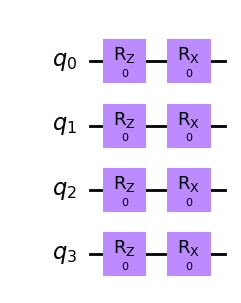

In [19]:
from qiskit import QuantumRegister, QuantumCircuit
q1 = QuantumRegister(4, 'q')
c1 = QuantumCircuit(q1)
c1.rz(0,[0,1,2,3])
c1.rx(0,q1)
c1.draw('mpl')
# without entanglement

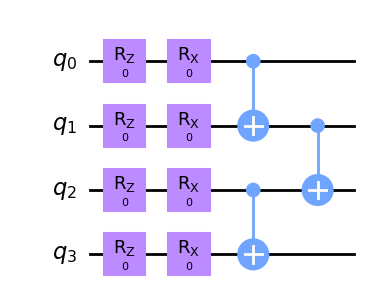

In [20]:
q2 = QuantumRegister(4, 'q')
c2 = QuantumCircuit(q1)
c2.rz(0,[0,1,2,3])
c2.rx(0,q1)
c2.cx(0,1)
c2.cx(2,3)
c2.cx(1,2)

c2.draw('mpl')

##  Quantum Feature Map

### ZFeatureMap
The first order Pauli Z-evolution circuit.

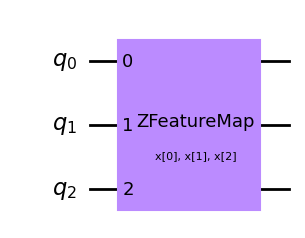

In [21]:
from qiskit.circuit.library import ZFeatureMap

qc_z = ZFeatureMap(feature_dimension=3, reps=1)
qc_z.draw('mpl')

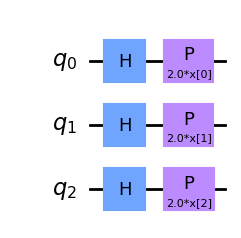

In [22]:
qc_z.decompose().draw('mpl')

## ZZFeatureMap
Second-order Pauli-Z evolution circuit.

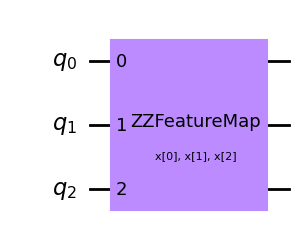

In [23]:
from qiskit.circuit.library import ZZFeatureMap

qc_zz = ZZFeatureMap(feature_dimension=3, reps=1, 
                     entanglement='full',
                     insert_barriers=True)
qc_zz.draw('mpl')

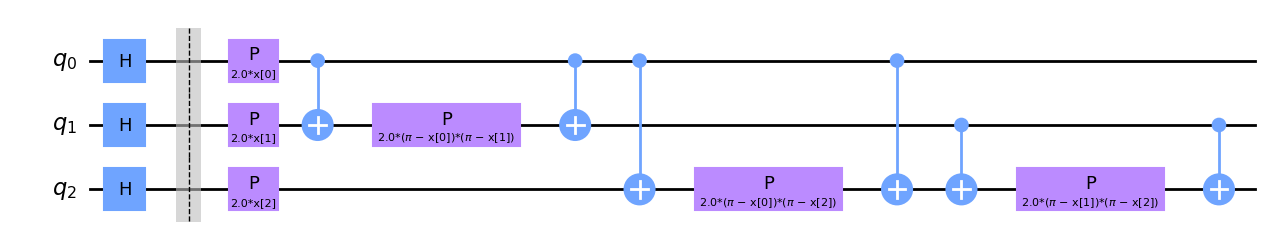

In [24]:
qc_zz.decompose().draw('mpl')

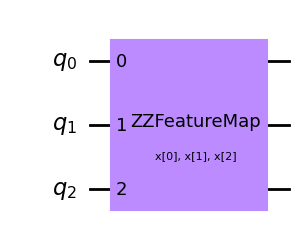

In [25]:
qc_zz = ZZFeatureMap(feature_dimension=3, reps=1, entanglement='linear',insert_barriers=True)
qc_zz.draw('mpl')

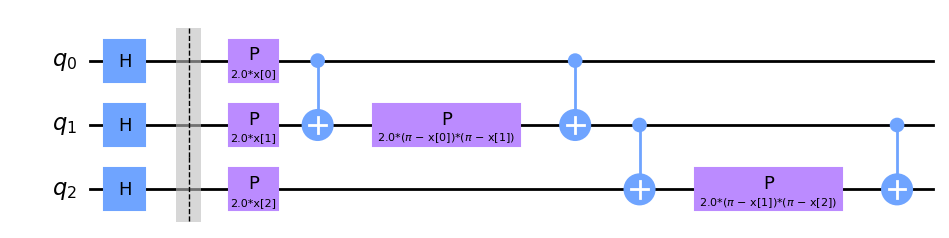

In [26]:
qc_zz.decompose().draw('mpl')

## Pauli Feature Map

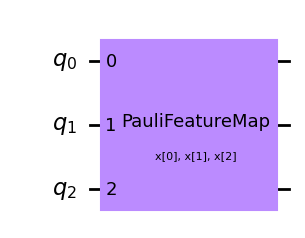

In [27]:
from qiskit.circuit.library import PauliFeatureMap

qc_p = PauliFeatureMap(feature_dimension=3, reps=1, paulis = ['Z','ZZ','ZY'])
qc_p.draw('mpl')

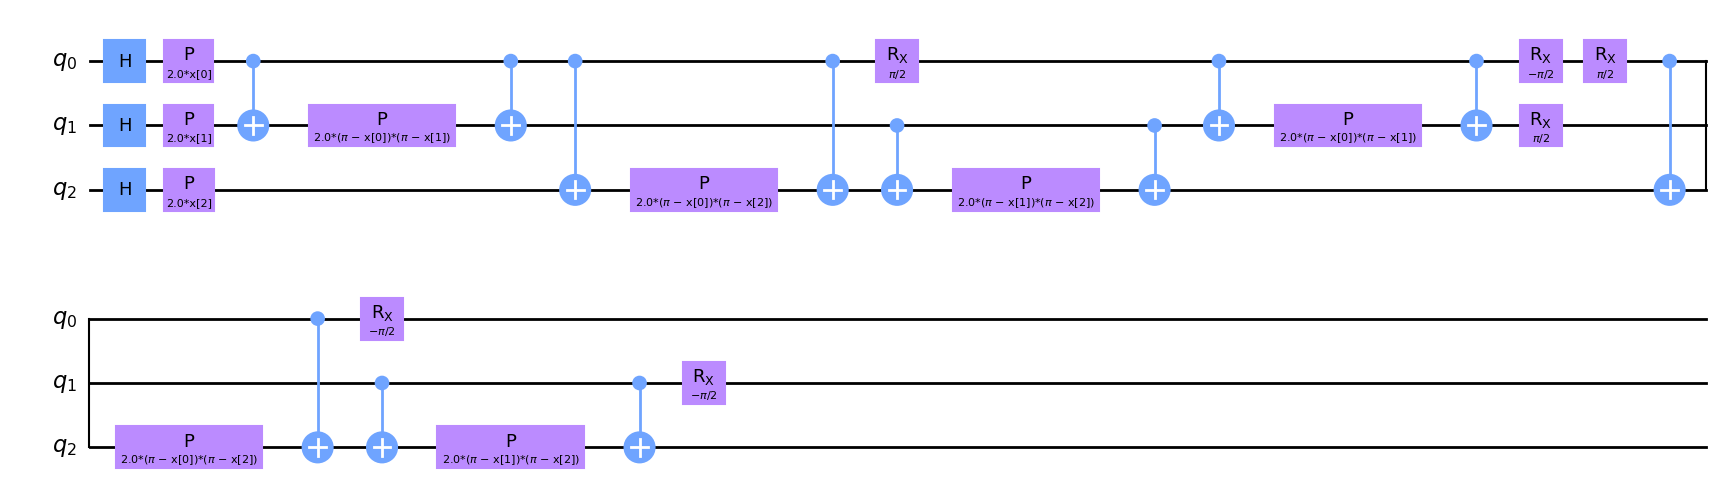

In [28]:
qc_p.decompose().draw('mpl')

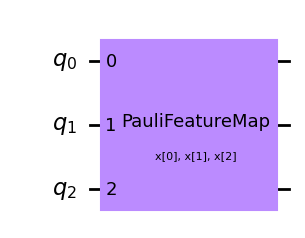

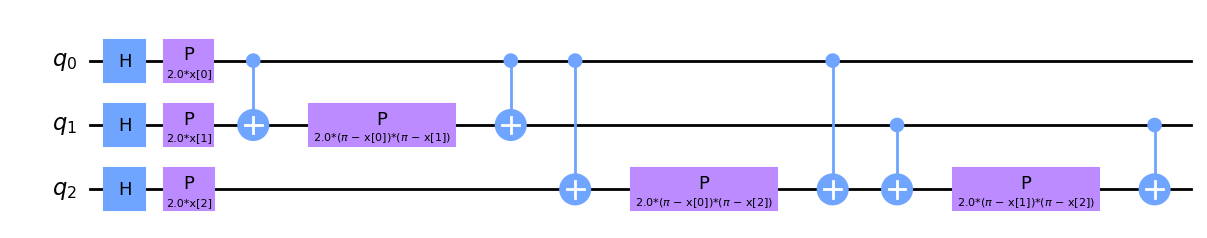

In [29]:
qc_p = PauliFeatureMap(feature_dimension=3, reps=1, paulis = ['Z','ZZ'])
display(qc_p.draw('mpl'))
qc_p.decompose().draw('mpl')

# Model Circuit

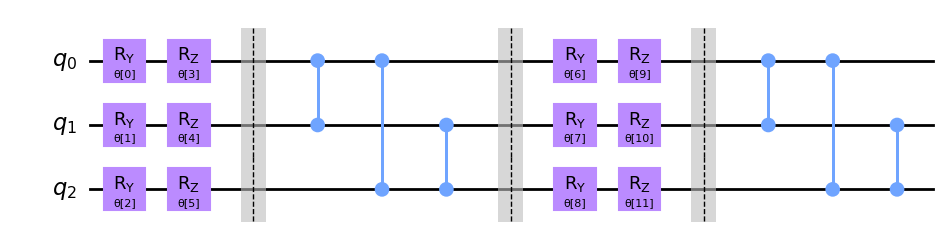

In [30]:
from qiskit.circuit.library import TwoLocal

qc_twolocal = TwoLocal(num_qubits=3, reps=2, rotation_blocks=['ry','rz'],
                entanglement_blocks='cz', skip_final_rotation_layer=True,
                insert_barriers=True)

qc_twolocal.decompose().draw('mpl')

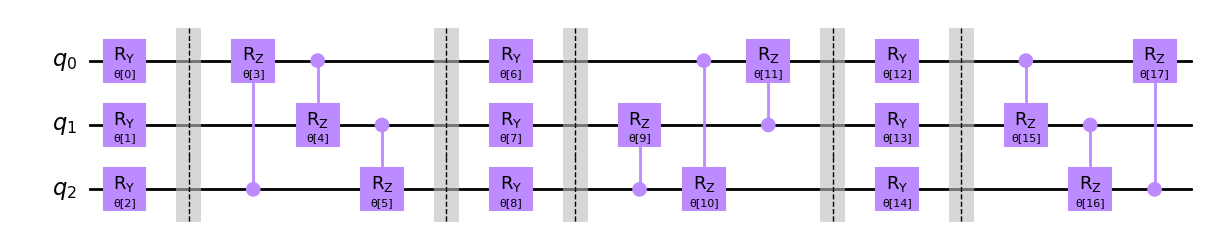

In [31]:
qc_13 = TwoLocal(3, rotation_blocks='ry',
                 entanglement_blocks='crz', entanglement='sca',
                 reps=3, skip_final_rotation_layer=True,
                 insert_barriers=True)

qc_13.decompose().draw('mpl')

## NLocal

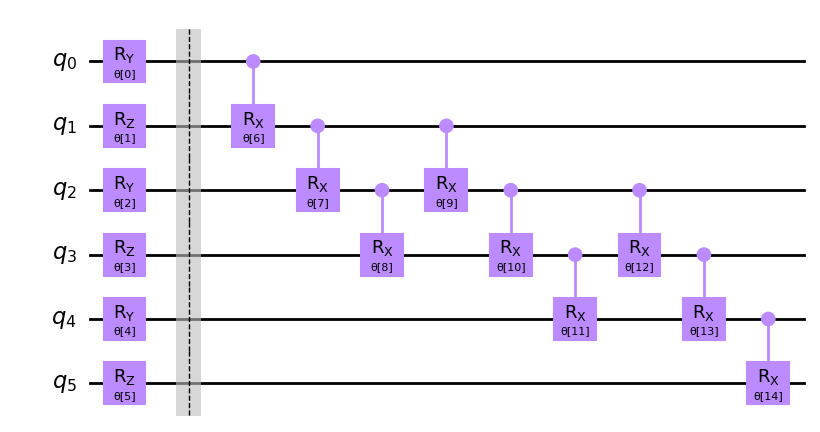

In [32]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector 
from qiskit.circuit.library import NLocal

# rotation block:
rot = QuantumCircuit(2)
params = ParameterVector('r', 2)
rot.ry(params[0], 0)
rot.rz(params[1], 1)

# entanglement block:
ent = QuantumCircuit(4)
params = ParameterVector('e', 3)
ent.crx(params[0], 0, 1)
ent.crx(params[1], 1, 2)
ent.crx(params[2], 2, 3)

qc_nlocal = NLocal(num_qubits=6, rotation_blocks=rot,
                   entanglement_blocks=ent, entanglement='linear',
                   skip_final_rotation_layer=True, insert_barriers=True)

qc_nlocal.decompose().draw('mpl')

## DATA EXAMPLE - Classification from scratch

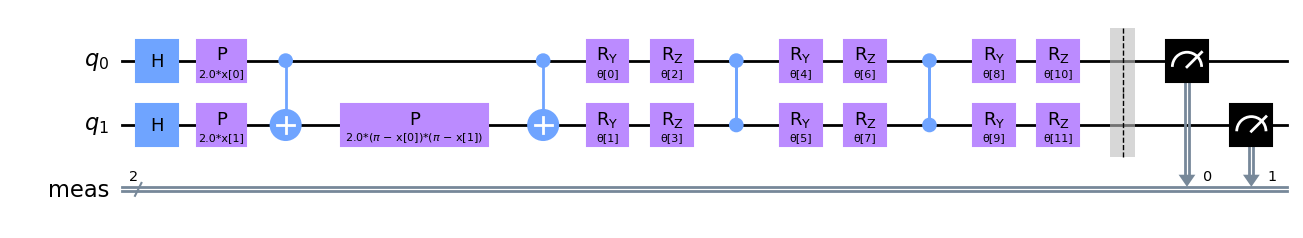

In [35]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import TwoLocal

FEATURE_MAP = ZZFeatureMap(feature_dimension=n_features, reps=1)
VAR_FORM = TwoLocal(n_features, ['ry', 'rz'], 'cz', reps=2)

AD_HOC_CIRCUIT = FEATURE_MAP.compose(VAR_FORM)
AD_HOC_CIRCUIT.measure_all()
AD_HOC_CIRCUIT.decompose().draw('mpl')

In [36]:
def circuit_instance(data, variational):
    parameters = {}
    for i, p in enumerate(FEATURE_MAP.ordered_parameters):
        parameters[p] = data[i]
    for i, p in enumerate(VAR_FORM.ordered_parameters):
        parameters[p] = variational[i]
    return AD_HOC_CIRCUIT.assign_parameters(parameters)

In [37]:
# INTERPRETATION (https://en.wikipedia.org/wiki/Parity_function)
def parity(bitstring):
    """Returns 1 if parity of `bitstring` is even, otherwise 0."""
    hamming_weight = sum(int(k) for k in list(bitstring))
    return (hamming_weight+1) % 2

In [38]:
# utility functions 
def label_probability(results):
    shots = sum(results.values())
    probabilities = {0: 0, 1: 0}
    for bitstring, counts in results.items():
        label = parity(bitstring)
        probabilities[label] += counts / shots
    return probabilities

from qiskit import BasicAer, execute

def classification_probability(data, variational):

    circuits = [circuit_instance(d, variational) for d in data]
    backend = BasicAer.get_backend('qasm_simulator')
    results = execute(circuits, backend).result()
    classification = [
        label_probability(results.get_counts(c)) for c in circuits]
    return classification

def cross_entropy_loss(classification, expected):

    p = classification.get(expected)  # Prob. of correct classification
    return -np.log(p + 1e-10)

def cost_function(data, labels, variational):

    classifications = classification_probability(data, variational)
    cost = 0
    for i, classification in enumerate(classifications):
        cost += cross_entropy_loss(classification, labels[i])
    cost /= len(data)
    return cost

In [39]:
class OptimizerLog:
    """Log to store optimizer's intermediate results"""
    def __init__(self):
        self.evaluations = []
        self.parameters = []
        self.costs = []
    def update(self, evaluation, parameter, cost, _stepsize, _accept):
        """Save intermediate results. Optimizer passes five values
        but we ignore the last two."""
        self.evaluations.append(evaluation)
        self.parameters.append(parameter)
        self.costs.append(cost)


In [40]:
# Set up the optimization
from qiskit_algorithms.optimizers  import SPSA

log = OptimizerLog()

optimizer = SPSA(maxiter=100, callback=log.update)

initial_point = np.random.random(VAR_FORM.num_parameters)

def objective_function(variational):
    return cost_function(x_train, y_train, variational)

In [41]:
result = optimizer.minimize(objective_function, initial_point)

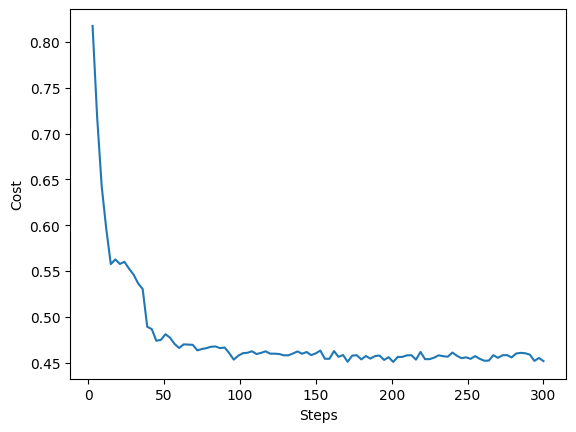

In [42]:
opt_var = result.x
opt_value = result.fun

import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(log.evaluations, log.costs)
plt.xlabel('Steps')
plt.ylabel('Cost')
plt.show()

In [43]:
def test_classifier(data, labels, variational):
    probability = classification_probability(data, variational)
    predictions = [0 if p[0] >= p[1] else 1 for p in probability]
    accuracy = 0
    # pylint: disable=invalid-name
    for i, prediction in enumerate(predictions):
        if prediction == labels[i]:
            accuracy += 1
    accuracy /= len(labels)
    return accuracy, predictions

accuracy, predictions = test_classifier(x_train, y_train, opt_var)

accuracy

0.8875

# Qiskit VQC class

In [44]:
# Data Encoding 
from qiskit.circuit.library import ZZFeatureMap

feature_map = ZZFeatureMap(feature_dimension=2, reps=2)

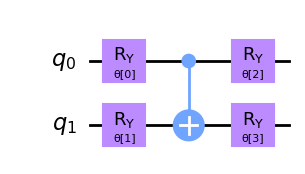

In [45]:
# Ansatz
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=2, reps=1)
ansatz.decompose().draw(output="mpl")

In [46]:
# OPTIMIZER AND SAMPLER
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler

optimizer = COBYLA(maxiter=100)
sampler = Sampler()

In [47]:
# some tools functions
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

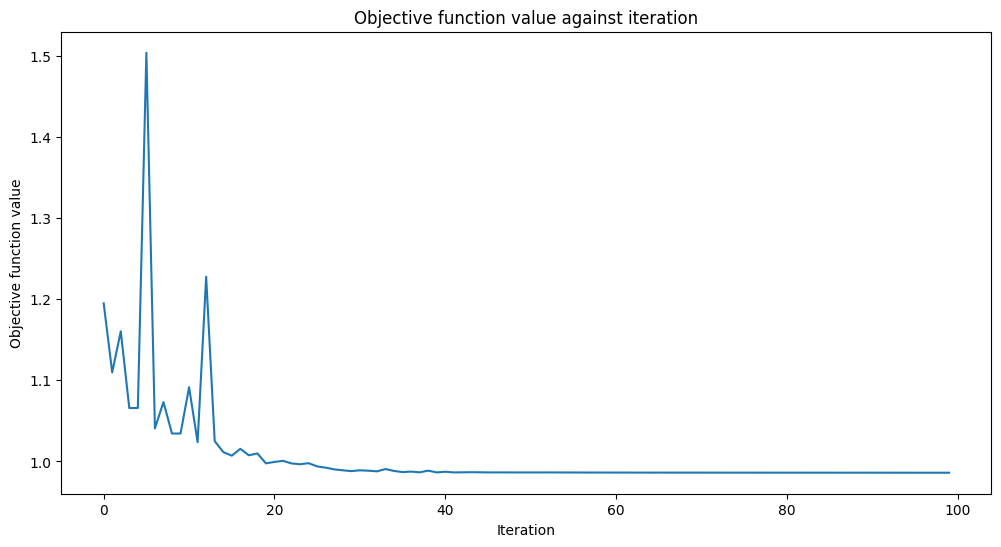

Time: 15 sec


In [48]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(x_train, y_train)
elapsed = time.time() - start

print(f"Time: {round(elapsed)} sec")

In [49]:
train_score_q4 = vqc.score(x_train, y_train)
print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")

Quantum VQC on the training dataset: 0.65
